In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import folium
%matplotlib inline

# Import dataset

In [2]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
airbnb.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [6]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df = airbnb.copy()
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
print(df.neighbourhood.unique())
print(len(df.neighbourhood.unique()))

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [9]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [10]:
df_bronx = df[df['neighbourhood_group'] == 'Bronx']
df_brook = df[df['neighbourhood_group'] == 'Brooklyn']
df_manhat = df[df['neighbourhood_group'] == 'Manhattan']
df_queens = df[df['neighbourhood_group'] == 'Queens']
df_stil = df[df['neighbourhood_group'] == 'Staten Island']

# Visualization

# 1. Host from each Neighbourhood
Pada tahap ini saya akan menampilkan jumlah host yang terdapat di setiap `neighbourhood` dari setiap `neighbourhood_group`.

In [11]:
def count_host(df):
    neighbourhood = df['neighbourhood'].value_counts().index
    count = df['neighbourhood'].value_counts()
    group = df['neighbourhood_group'].unique()[0]
    plt.figure(figsize=(16,10))
    sns.barplot(x=neighbourhood, y=count)
    plt.xticks(rotation=90)
    for i in list(range(len(neighbourhood))):
        if df['neighbourhood'].value_counts().max() > 1000:
            plt.text(i-0.5, df['neighbourhood'].value_counts()[i]+50, df['neighbourhood'].value_counts()[i])
        elif 100 <= df['neighbourhood'].value_counts().max() <= 1000:
            plt.text(i-0.5, df['neighbourhood'].value_counts()[i]+5, df['neighbourhood'].value_counts()[i])
        elif df['neighbourhood'].value_counts().max() <= 100:
            plt.text(i-0.5, df['neighbourhood'].value_counts()[i]+1, df['neighbourhood'].value_counts()[i])
    plt.title(f'Total Host In Each Neighbourhood In {group}')
    return plt.show()

## 1.1 Brooklyn

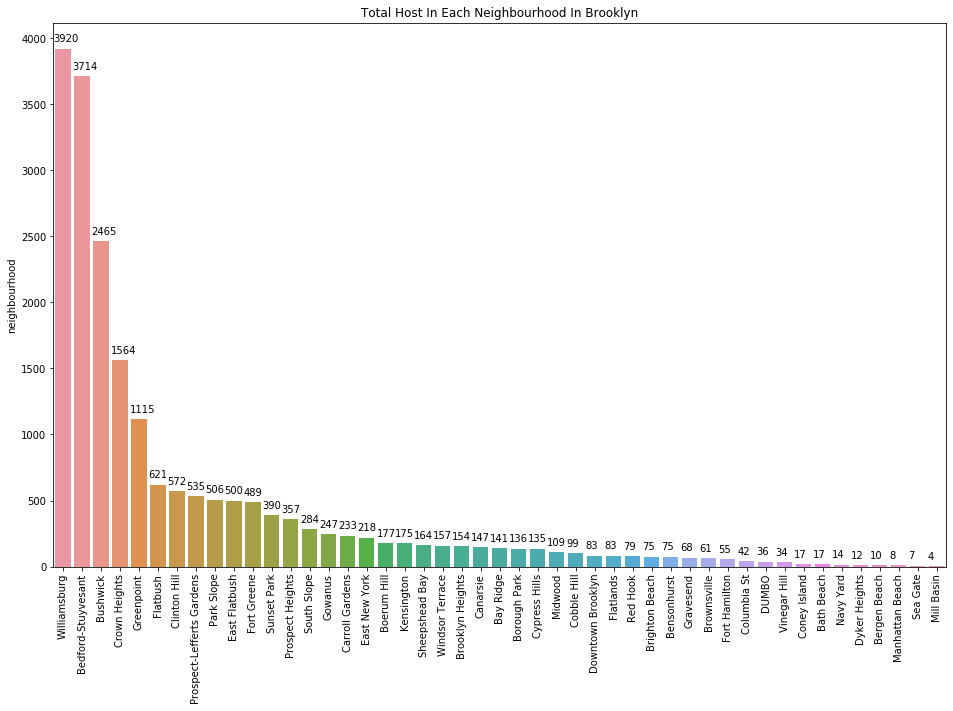

In [12]:
count_host(df_brook)

## 1.2 Manhattan

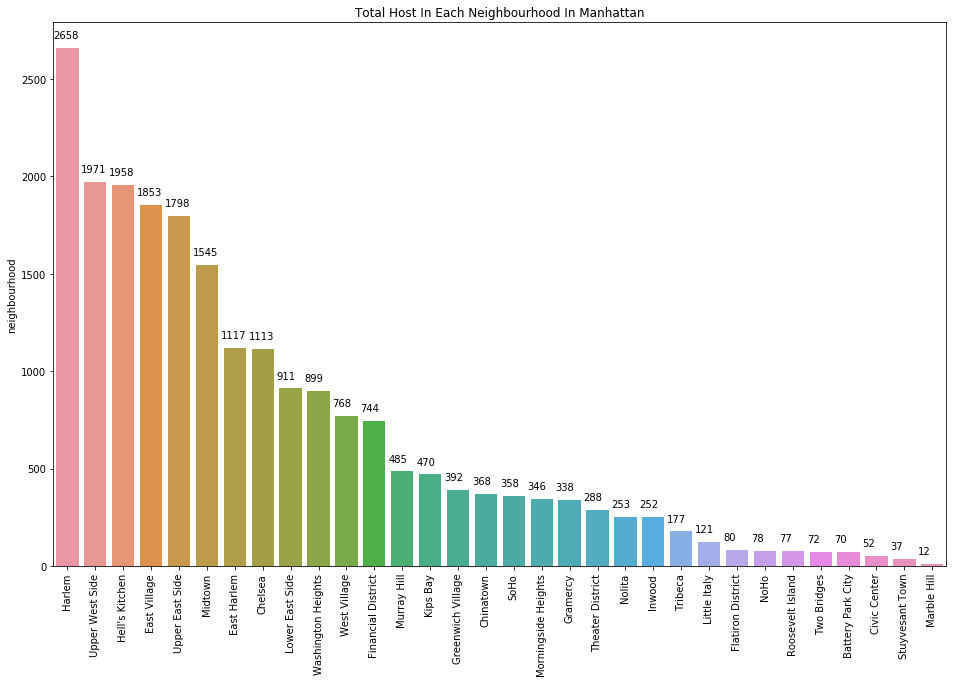

In [13]:
count_host(df_manhat)

## 1.3 Queens

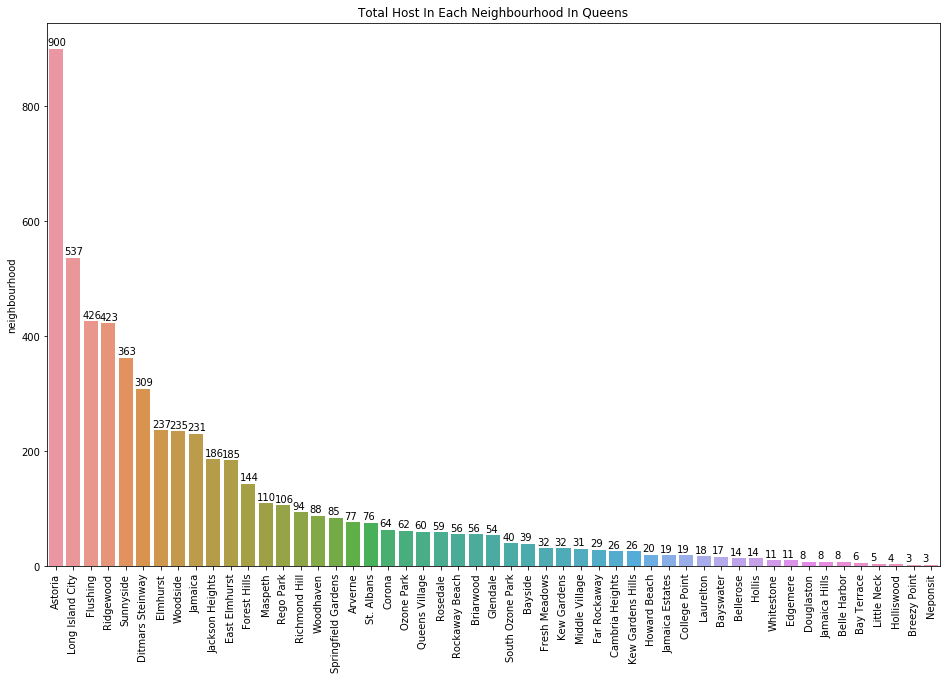

In [14]:
count_host(df_queens)

## 1.4 Staten Island 

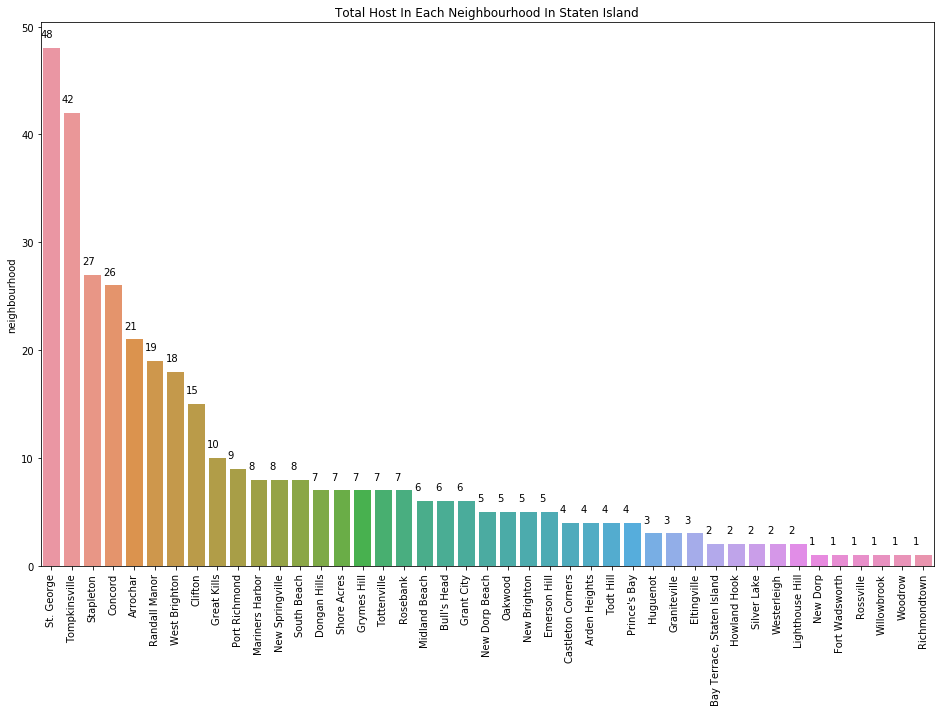

In [15]:
count_host(df_stil)

## 1.5 Bronx 

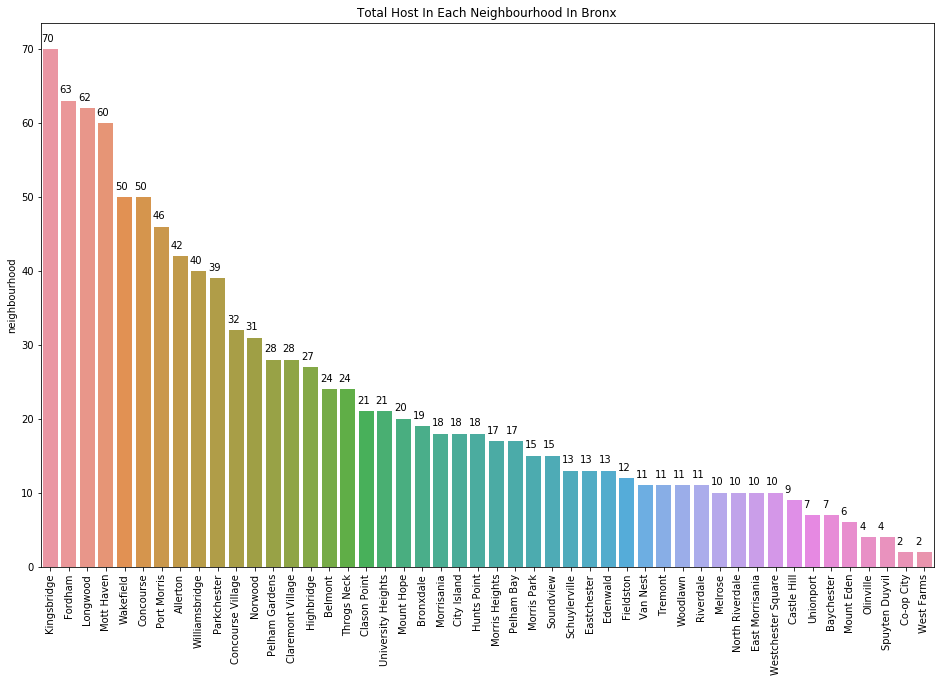

In [16]:
count_host(df_bronx)

# Visualizing Neighbourhood Group Distribution
Pada tahap ini saya akan menampilkan distribusi host pada setiap `neighbourhood_group`

<Figure size 1152x720 with 0 Axes>

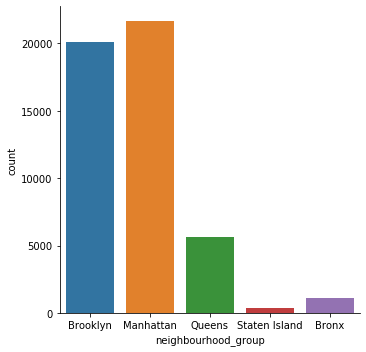

In [17]:
plt.figure(figsize=(16,10))
sns.catplot(x='neighbourhood_group', kind='count', data=df)
plt.show()

# Visualizing Latitude and Longitude
Pada tahap ini saya akan menampilkan sebaran data menurut latitude dan longitude dari setiap host

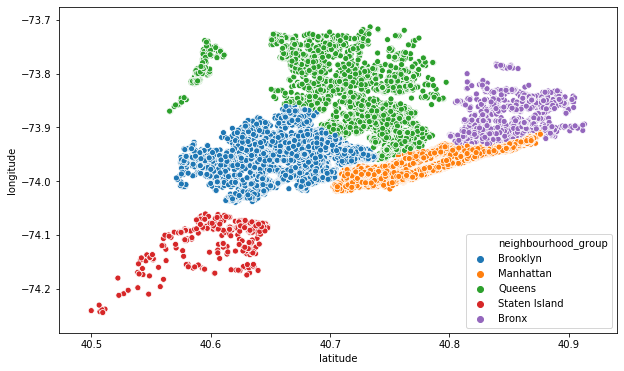

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['latitude'], y=df['longitude'], hue=df['neighbourhood_group'])

# Visualizing Room Type Distribution
Pada tahap ini saya akan menampilkan distribusi total "room_type" yang terdapat dalam dataset ini

<Figure size 720x432 with 0 Axes>

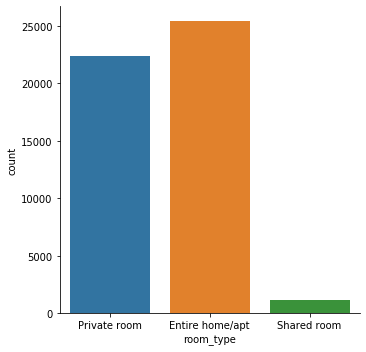

In [19]:
plt.figure(figsize=(10,6))
sns.catplot(x='room_type', kind='count', data=df)
plt.show()

Juga menampilkan sebaran harga per malam dari tiap `room_type` di tiap `neighbourhood_group` 

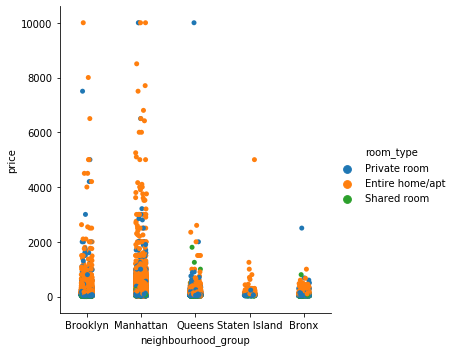

In [53]:
sns.catplot(x='neighbourhood_group', y='price', hue='room_type', data=df)
plt.show()

Dapat dilihat bahwa terdapat outliers pada setiap `neighbourhood_group`. `Manhattan` dan `Brooklyn` adalah `neighbourhood_group` yang paling banyak memiliki nilai outliers. Ini bisa terjadi dikarenakan `Manhattan` menurut Wikipedia adalah "ibu kota dunia" dari kebudayaan, finansial, media, dan hiburan. Ini mengakibatkan banyaknya traffic keluar masuknya turis, businessman dan lain sebagainya di kota ini. Sedangkan `Brooklyn` adalah kota dengan kepadatan penduduk tertinggi nomor 3 di Amerika Serikat, Setelah Los Angeles dan Chicago.

# Preprocessing Data
Pertama-tama kita akan membagi dataframe menjadi dua. Satu dataframe untuk dataframe yang akan kita modeling tanpa menggunakan fitur `neighbourhood`, kita akan memasukkan dataframe ini dalam variable `abnb`. Dataframe yang lain, akan kita modeling menggunakan semua fitur termasuk `neighbourhood`, kita akan memasukkan dataframe ini dalam variable `abnb2`.

In [20]:
abnb = df.copy()
abnb2 = df.copy()
abnb.drop(['id', 'name', 'host_id', 'neighbourhood', 'host_name', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis=1, inplace=True)
abnb2.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis=1, inplace=True)

In [21]:
abnb.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0


In [22]:
abnb2.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0


## Preprocessing `ab_dummy`

## Make a dummy data
Pada tahap ini saya akan membuat data dummy untuk mengklasifikasikan `neighbourhood_group` dan `room_type`. Ini dilakukan untuk mengubah value `neighbourhood_group` dan `room_type` yang awalnya berupa `Object` menjadi `Int` sehingga value tersebut dapat berguna dan dapat digunakan untuk melakukan model fitting.

In [23]:
ab_dummy = pd.get_dummies(abnb, prefix='dummy')
ab_dummy

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,40.64749,-73.97237,149,1,9,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,9,0,1,0,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,36,0,1,0,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,27,0,0,1,0,0,1,0,0
48893,40.75751,-73.99112,55,1,0,2,0,0,1,0,0,0,0,1


## Data scaling using MinMaxScaler
Pada tahap ini saya akan melakukan scaling pada feature yang terdapat pada `ab_dummy` dengan menggunakan `MinMaxScaler`. Hal ini dilakukan untuk mengeliminasi nilai-nilai outliers yang mungkin akan berdampak pada hasil model fitting nantinya.

In [24]:
columns = ab_dummy.columns.tolist()
scaler = MinMaxScaler()
scaler.fit(ab_dummy[columns])
for i in range(len(columns)):
    ab_dummy[columns[i]] = scaler.transform(ab_dummy[columns])[:,i]
ab_dummy['price'] = abnb.price

In [25]:
ab_dummy.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,0.357393,0.511921,149,0.000000,0.014308,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.614199,0.490469,225,0.000000,0.071542,0.972603,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.748252,0.569257,150,0.001601,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.448496,0.535649,89,0.000000,0.429253,0.531507,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.722820,0.565324,80,0.007206,0.014308,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Visualizing `ab_dummy` correlation
Setelah melakukan scaling, saya akan melakukan visualisasi korelasi dari data `ab_dummy` yang sudah dilakukan scaling

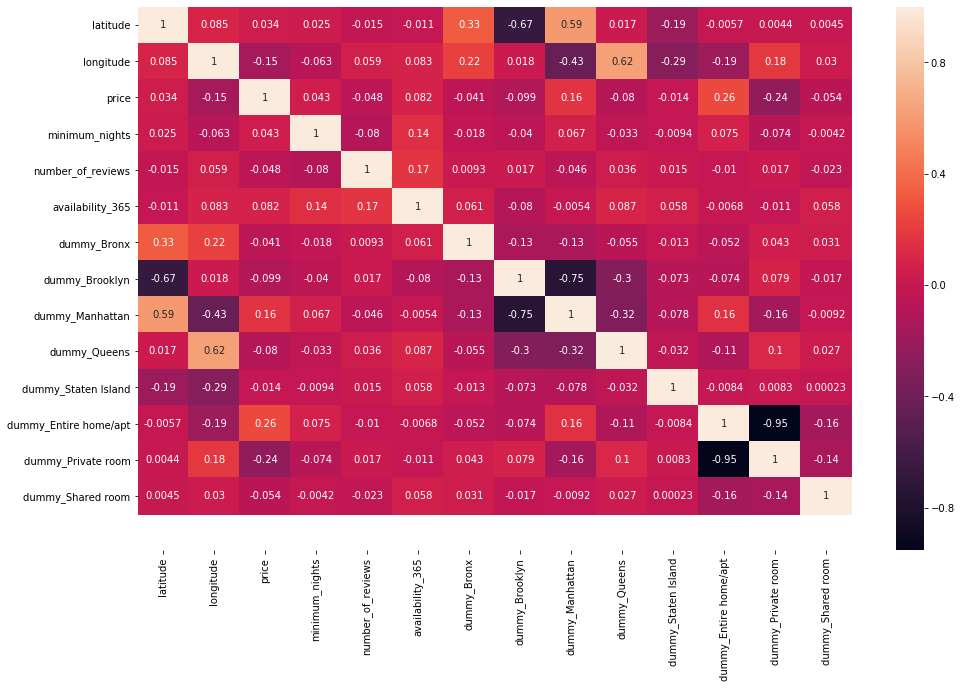

In [55]:
plt.figure(figsize=(16,10))
sns.heatmap(ab_dummy.corr(), annot=True)
plt.ylim(15,0)
plt.show()

Dari visualisasi data di atas dapat diketahui bahwa korelasi features terhadap target (`price`) sangat kecil. Mayoritas mendekati korelasi dengan score 0. Score paling tinggi dapat dilihat hanya ada pada dua features saja yaitu `dummy_Entire home/apt` (+0.26) dan `dummy_Private room` (-0.24).

In [69]:
ab_correlation = pd.DataFrame(ab_dummy.corr().loc[:,'price'].sort_values(ascending=False))
ab_correlation = ab_correlation.rename(columns={'price': 'corr_values_with_price'})

In [70]:
ab_correlation

,corr_values_with_price
price,1.000000
dummy_Entire home/apt,0.255857
dummy_Manhattan,0.163976
availability_365,0.081829
minimum_nights,0.042799
latitude,0.033939
dummy_Staten Island,-0.013840
dummy_Bronx,-0.041030
number_of_reviews,-0.047954
dummy_Shared room,-0.053613


In [72]:
X = ab_dummy.drop('price', axis=1)
y = ab_dummy[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

# Training data using Decision Tree Regressor
## Tuning Hyperparameters
## 1. Tuning `max_depth`

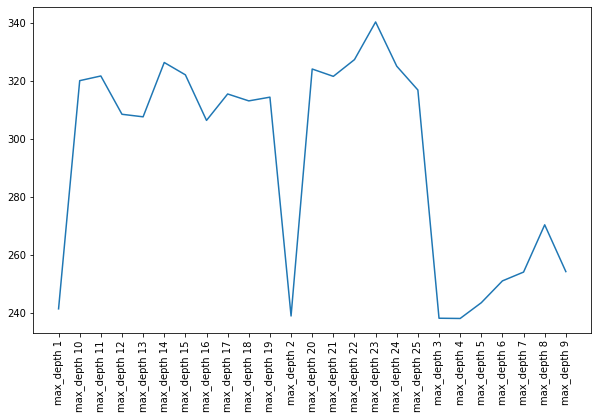

In [73]:
max_depths = list(range(1,26))
value_rmse = {}
for i in max_depths:
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    prediction = dtr.predict(X_test)
    value_rmse[f'max_depth {i}'] = np.sqrt(mean_squared_error(y_test, prediction))
value_rmse
value_list = sorted(value_rmse.items())
x, y = zip(*value_list)
# print(x, y)
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()

## 2. Tuning `min_samples_split`

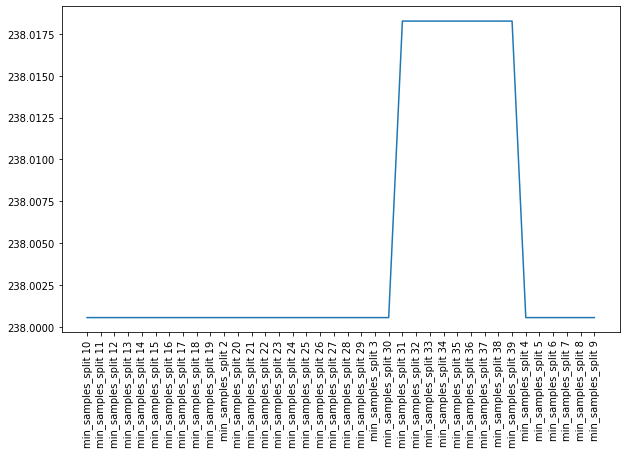

In [74]:
samples_split = list(range(2,40))
value_rmse = {}
for i in samples_split:
    dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=i)
    dtr.fit(X_train, y_train)
    prediction = dtr.predict(X_test)
    value_rmse[f'min_samples_split {i}'] = np.sqrt(mean_squared_error(y_test, prediction))
value_rmse
value_list = sorted(value_rmse.items())
x, y = zip(*value_list)
# print(x, y)
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()

## 3. Tuning `random_state`

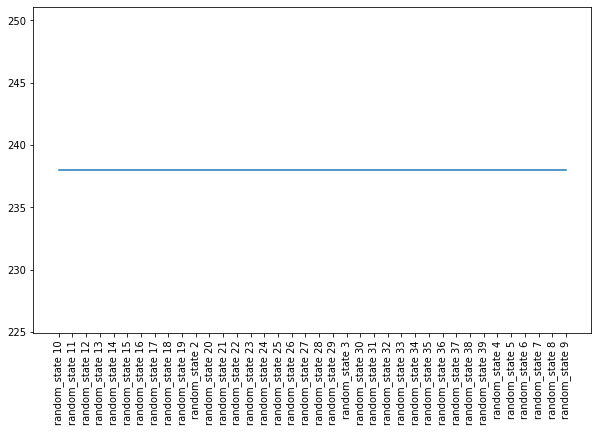

In [30]:
random = list(range(2,40))
value_rmse = {}
for i in random:
    dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=2, random_state=i)
    dtr.fit(X_train, y_train)
    prediction = dtr.predict(X_test)
    value_rmse[f'random_state {i}'] = np.sqrt(mean_squared_error(y_test, prediction))
value_rmse
value_list = sorted(value_rmse.items())
x, y = zip(*value_list)
# print(x, y)
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()

## 4. Tuning `min_samples_leaf`

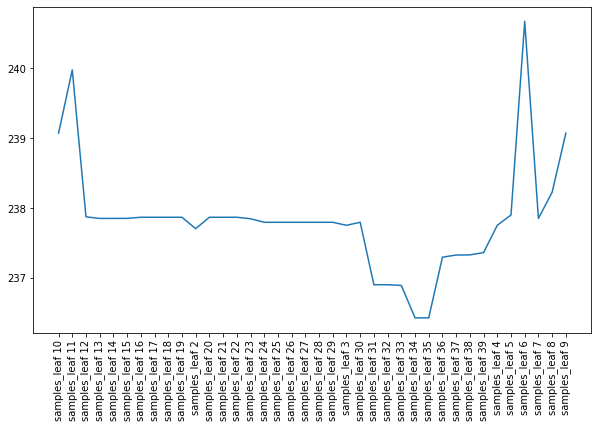

In [31]:
samples_leaf = list(range(2,40))
value_rmse = {}
for i in samples_leaf:
    dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=i, random_state=1)
    dtr.fit(X_train, y_train)
    prediction = dtr.predict(X_test)
    value_rmse[f'samples_leaf {i}'] = np.sqrt(mean_squared_error(y_test, prediction))
value_rmse
value_list = sorted(value_rmse.items())
x, y = zip(*value_list)
# print(x, y)
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()

## 5. Tuning `min_samples_leaf` and `random_state`

In [32]:
samples_leaf = list(range(31,36))
random_state = list(range(1,25))
value_rmse = {}
for i in samples_leaf:
    temp_values = {}
    for j in random_state:
        dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=i, random_state=j)
        dtr.fit(X_train, y_train)
        prediction = dtr.predict(X_test)
        temp_values[j] = np.sqrt(mean_squared_error(y_test, prediction))
    value_rmse[f'samples_leaf {i}'] = temp_values 
value_rmse

{'samples_leaf 31': {1: 236.90081486887678,
  2: 236.90081486887678,
  3: 236.90081486887678,
  4: 236.90081486887678,
  5: 236.90081486887678,
  6: 236.90081486887678,
  7: 236.90081486887678,
  8: 236.90081486887678,
  9: 236.90081486887678,
  10: 236.90081486887678,
  11: 236.90081486887678,
  12: 236.90081486887678,
  13: 236.90081486887678,
  14: 236.90081486887678,
  15: 236.90081486887678,
  16: 236.90081486887678,
  17: 236.90081486887678,
  18: 236.90081486887678,
  19: 236.90081486887678,
  20: 236.90081486887678,
  21: 236.90081486887678,
  22: 236.90081486887678,
  23: 236.90081486887678,
  24: 236.90081486887678},
 'samples_leaf 32': {1: 236.90081486887678,
  2: 236.90081486887678,
  3: 236.90081486887678,
  4: 236.90081486887678,
  5: 236.90081486887678,
  6: 236.90081486887678,
  7: 236.90081486887678,
  8: 236.90081486887678,
  9: 236.90081486887678,
  10: 236.90081486887678,
  11: 236.90081486887678,
  12: 236.90081486887678,
  13: 236.90081486887678,
  14: 236.9008148

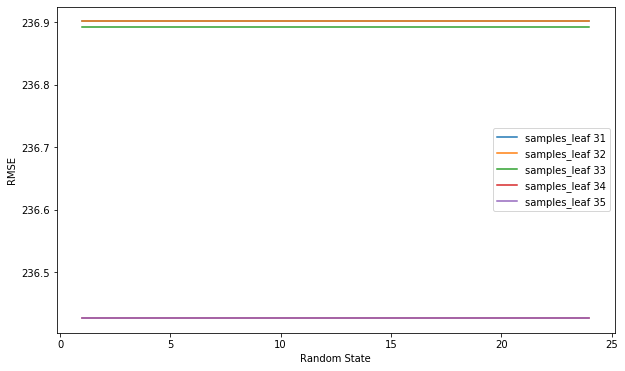

In [33]:
plt.figure(figsize=(10,6))
for k, v in value_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    x.sort()
    plt.plot(x,y,label=k)
    plt.xlabel('Random State')
    plt.ylabel('RMSE')
    plt.legend()

Dari visualisasi di atas dapat diambil kesimpulan, hyperparams terbaik saat ini adalah dengan menggunakan `max_depth`=4, `min_samples_split`=2, `min_samples_leaf`=34 / 35, `random_state`= range(1,25)

# Train using only four best correlated features

In [78]:
X2 = ab_dummy[['dummy_Entire home/apt', 'dummy_Manhattan', 'dummy_Private room', 'longitude']]
y2 = ab_dummy[['price']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=True)

In [79]:
samples_leaf = list(range(31,36))
random_state = list(range(1,25))
value_rmse = {}
for i in samples_leaf:
    temp_values = {}
    for j in random_state:
        dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=i, random_state=j)
        dtr.fit(X2_train, y2_train)
        prediction = dtr.predict(X2_test)
        temp_values[j] = np.sqrt(mean_squared_error(y2_test, prediction))
    value_rmse[f'samples_leaf {i}'] = temp_values 
value_rmse

{'samples_leaf 31': {1: 204.26813402733652,
  2: 204.26813402733652,
  3: 204.26813402733652,
  4: 204.26813402733652,
  5: 204.26813402733652,
  6: 204.26813402733652,
  7: 204.26813402733652,
  8: 204.26813402733652,
  9: 204.26813402733652,
  10: 204.26813402733652,
  11: 204.26813402733652,
  12: 204.26813402733652,
  13: 204.26813402733652,
  14: 204.26813402733652,
  15: 204.26813402733652,
  16: 204.26813402733652,
  17: 204.26813402733652,
  18: 204.26813402733652,
  19: 204.26813402733652,
  20: 204.26813402733652,
  21: 204.26813402733652,
  22: 204.26813402733652,
  23: 204.26813402733652,
  24: 204.26813402733652},
 'samples_leaf 32': {1: 203.81747978599645,
  2: 203.81747978599645,
  3: 203.81747978599645,
  4: 203.81747978599645,
  5: 203.81747978599645,
  6: 203.81747978599645,
  7: 203.81747978599645,
  8: 203.81747978599645,
  9: 203.81747978599645,
  10: 203.81747978599645,
  11: 203.81747978599645,
  12: 203.81747978599645,
  13: 203.81747978599645,
  14: 203.8174797

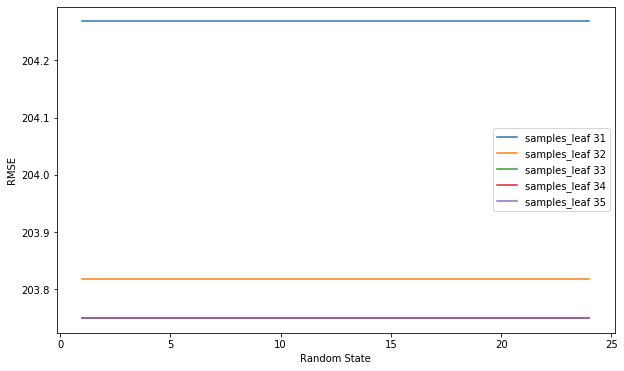

In [80]:
plt.figure(figsize=(10,6))
for k, v in value_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    x.sort()
    plt.plot(x,y,label=k)
    plt.xlabel('Random State')
    plt.ylabel('RMSE')
    plt.legend()

## Train using all features available

In [34]:
ab2_dummy = pd.get_dummies(abnb2, prefix='dummy')
ab2_dummy.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,...,dummy_Williamsburg,dummy_Willowbrook,dummy_Windsor Terrace,dummy_Woodhaven,dummy_Woodlawn,dummy_Woodrow,dummy_Woodside,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,40.64749,-73.97237,149,1,9,365,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,355,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,365,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,194,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
columns = ab2_dummy.columns.tolist()
scaler = MinMaxScaler()
scaler.fit(ab2_dummy[columns])
for i in range(len(columns)):
    ab2_dummy[columns[i]] = scaler.transform(ab2_dummy[columns])[:,i]
ab2_dummy['price'] = abnb.price

In [36]:
ab2_dummy.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,...,dummy_Williamsburg,dummy_Willowbrook,dummy_Windsor Terrace,dummy_Woodhaven,dummy_Woodlawn,dummy_Woodrow,dummy_Woodside,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,0.357393,0.511921,149,0.000000,0.014308,1.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.614199,0.490469,225,0.000000,0.071542,0.972603,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.748252,0.569257,150,0.001601,0.000000,1.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.448496,0.535649,89,0.000000,0.429253,0.531507,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.722820,0.565324,80,0.007206,0.014308,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
features = ab2_dummy.columns.tolist()
features.remove('price')
target = ['price']
X = ab2_dummy[features]
y = ab2_dummy[target]

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

In [39]:
samples_leaf = list(range(31,36))
random_state = list(range(1,25))
value_rmse = {}
for i in samples_leaf:
    temp_values = {}
    for j in random_state:
        dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=i, random_state=j)
        dtr.fit(X_train2, y_train2)
        prediction = dtr.predict(X_test2)
        temp_values[j] = np.sqrt(mean_squared_error(y_test2, prediction))
    value_rmse[f'samples_leaf {i}'] = temp_values 
value_rmse

{'samples_leaf 31': {1: 233.86914464761372,
  2: 233.86914464761372,
  3: 233.86914464761372,
  4: 233.86914464761372,
  5: 233.86914464761372,
  6: 233.86914464761372,
  7: 233.86914464761372,
  8: 233.86914464761372,
  9: 233.86914464761372,
  10: 233.86914464761372,
  11: 233.86914464761372,
  12: 233.86914464761372,
  13: 233.86914464761372,
  14: 233.86914464761372,
  15: 233.86914464761372,
  16: 233.86914464761372,
  17: 233.86914464761372,
  18: 233.86914464761372,
  19: 233.86914464761372,
  20: 233.86914464761372,
  21: 233.86914464761372,
  22: 233.86914464761372,
  23: 233.86914464761372,
  24: 233.86914464761372},
 'samples_leaf 32': {1: 233.86914464761372,
  2: 233.86914464761372,
  3: 233.86914464761372,
  4: 233.86914464761372,
  5: 233.86914464761372,
  6: 233.86914464761372,
  7: 233.86914464761372,
  8: 233.86914464761372,
  9: 233.86914464761372,
  10: 233.86914464761372,
  11: 233.86914464761372,
  12: 233.86914464761372,
  13: 233.86914464761372,
  14: 233.8691446

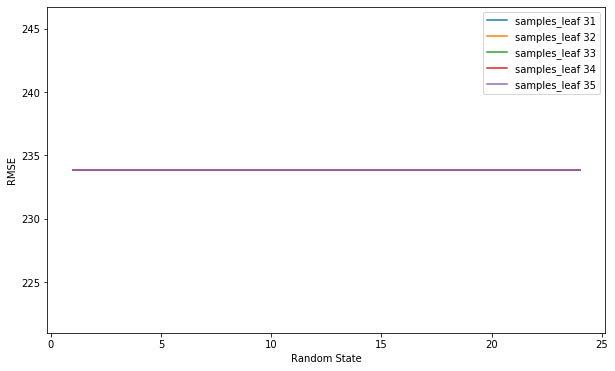

In [40]:
plt.figure(figsize=(10,6))
for k, v in value_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    x.sort()
    plt.plot(x,y,label=k)
    plt.xlabel('Random State')
    plt.ylabel('RMSE')
    plt.legend()

Dari keseluruhan tahap ini dapat saya tarik kesimpulan bahwa hasil terbaik dengan menggunakan:
- Empat fitur terbaik (regardless it's negative or positive)
- Hasil terbaik (scoring menggunakan RSME) yang bisa didapat dengan model Decission Tree Regressor adalah USD 203.7

# Visualizing predicting result using best DTR model

In [82]:
dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=33, random_state=1)
dtr.fit(X2_train, y2_train)
y2_test['price_pred'] = dtr.predict(X2_test)
pred = y2_test.copy().sort_index()

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


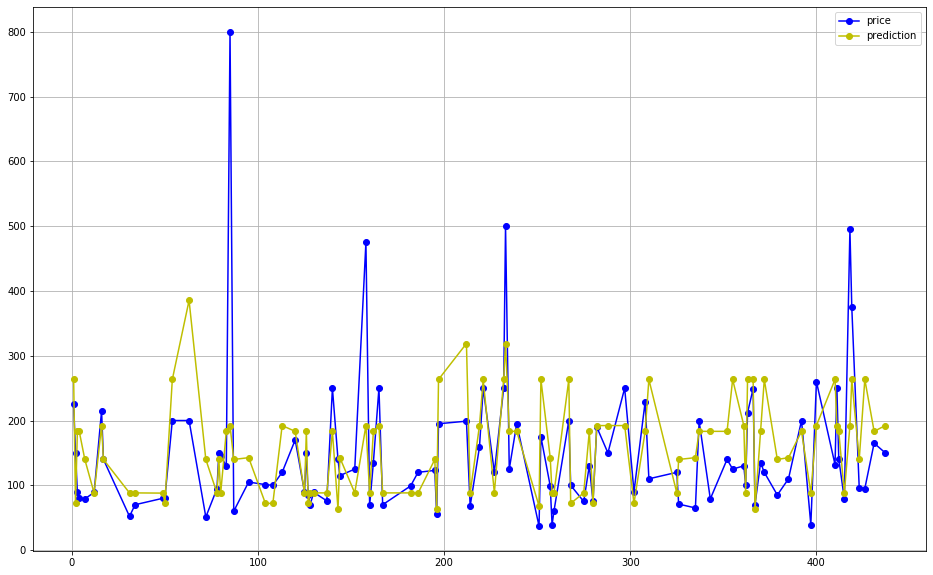

In [94]:
plt.figure(figsize=(16,10))
plt.plot(pred.head(100).index, pred['price'].head(100), 'bo-', label='price')
plt.plot(pred.head(100).index, pred['price_pred'].head(100), 'yo-', label='prediction')
plt.legend()
plt.grid()
plt.show()

# Next step?
Langkah selanjutnya adalah melakukan testing menggunakan model regression yang lain, untuk mengetahui sampai seberapa baik data ini dapat melakukan prediksi. Hasil akhir yang diinginkan adalah mendapatkan model yang terbaik untuk melakukan prediksi harga dan kasifikasi `neighbourhood_group` yang tepat.